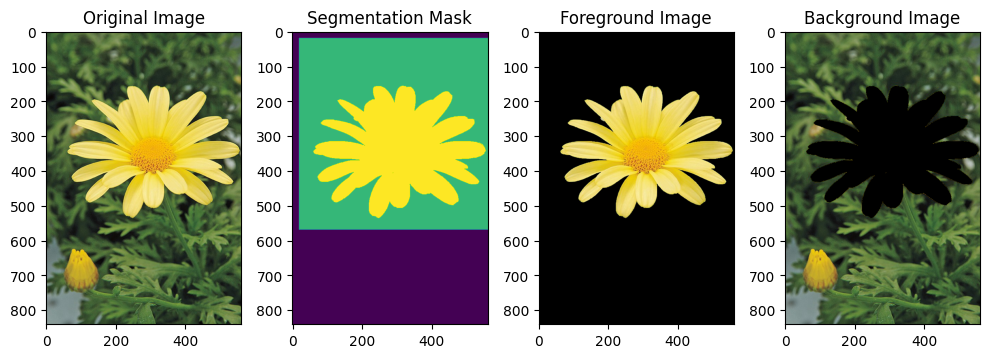

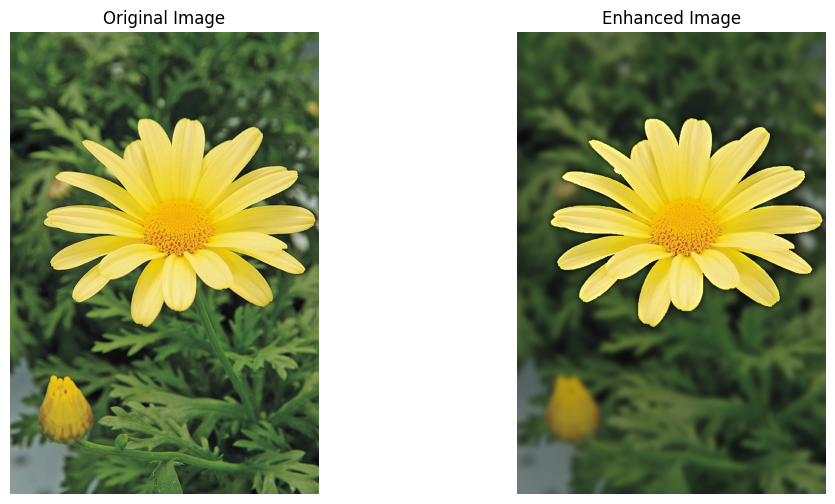

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('daisy.jpg')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (20, 20, 550, 550)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Showing the final segmentation mask, foreground image, and background image
plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.subplot(142), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(143), plt.imshow(foreground[:,:,::-1]), plt.title('Foreground Image')
plt.subplot(144), plt.imshow(background[:,:,::-1]), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Displaying the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()